# b) Regression

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz 
import pydotplus
import seaborn as sb
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

path = "C:\\Users\\Talal\\School\\CSC 177\\Labs\\Lab 2\\"
filename = 'bottle.csv'

filename_read = os.path.join(path,filename)
df = pd.read_csv(filename_read,na_values=['NA','?'])

df = df.dropna()

def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

# visualize the relationship
sb.pairplot(df, x_vars='T_degC', y_vars='Salnty', height=4, aspect=2, kind='reg')

Root mean squared error = 0.1250
R-squared = 0.8442


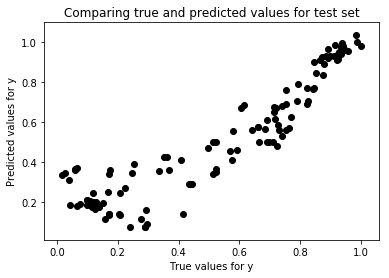

In [9]:
# Linear Regression
normalize_numeric_minmax(df, 'T_degC')
normalize_numeric_minmax(df, 'Salnty')
X = df[['T_degC']]
y = df[['Salnty']]
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=1)
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred_test = regr.predict(x_test)

plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))



## Multiple Linear Regression

Slope =  -0.95964134
Intercept =  1.0339228


Text(0, 0.5, 'y')

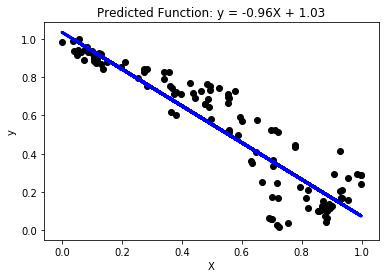

In [6]:
#Multiple Linear Regression
#Continues from Linear Regression

print('Slope = ', regr.coef_[0][0])
print('Intercept = ', regr.intercept_[0]) ### Step 4: Postprocessing

# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred_test, color='blue', linewidth=3)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_[0], regr.intercept_[0])
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('y')